In [1]:
import pandas as pd

df = pd.read_csv('train.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2584\3319590276.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [2]:
print(len(df))

33538


In [3]:
df.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_ch

Real Bed         32907
Futon              251
Pull-out Sofa      193
Airbed             130
Couch               57
Name: bed_type, dtype: int64

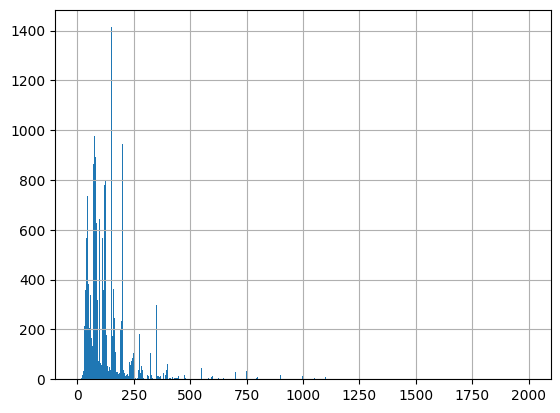

In [4]:
df['price'].hist(bins = 1000)
df['bed_type'].value_counts()

In [5]:
from math import isnan

def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

def to_judge(s):
    ret = -1
    if s == "t":
        ret = 1
    if s == "f":
        ret = 0
    return ret

def to_dollar(s):
    try:
        ret = to_float(s.replace("$",""))
    except:
        ret = -1
    return ret
def to_cannal(s):
    ret = -1
    if s == "flexible":
        ret = 0
    if s == "moderate":
        ret = 1
    if s == "super_strict_60":
        ret = 2
    if s == "strict_14_with_grace_period":
        ret = 3
    return ret

def to_bed_type(s):
    ret = -1
    if s == "Real Bed":
        ret = 0
    if s == "Futon":
        ret = 1
    if s == "Airbed":
        ret = 2
    if s == "Couch":
        ret = 3
    return ret
def to_room_type(s):
    ret = -1
    if s == "Entire home/apt":
        ret = 0
    if s == "Private room":
        ret = 1
    if s == "Shared room":
        ret = 2
    return ret

def to_property_type(s):
    ret = -1
    if s == "Apartment":
        ret = 0
    if s == "House":
        ret = 1
    if s == "Townhouse":
        ret = 2
    if s == "Loft":
        ret = 3
    if s == "Condominium":
        ret = 4
    if s == "Serviced apartment":
        ret = 5
    if s == "Guest suite":
        ret = 6
    if s == "Other":
        ret = 7
    if s == "Boutique hotel":
        ret = 8
    if s == "Bed and breakfast":
        ret = 9
    if s == "Resort":
        ret = 10
    if s == "Guesthouse":
        ret = 11
    if s == "Hostel":
        ret = 12
    if s == "Hotel":
        ret = 13
    if s == "Bungalow":
        ret = 14
    if s == "Villa":
        ret = 15
    if s == "Tiny house":
        ret = 16
    if s == "Aparthotel":
        ret = 17
    if s == "Boat":
        ret = 18
    if s == "Cottage":
        ret = 19
    if s == "Tent":
        ret = 20
    if s == "Camper/RV":
        ret = 21
    return ret
categories1 = [x for x in list(set(df['neighbourhood_group_cleansed'])) if type(x) is str]
categories3 = [x for x in list(set(df['host_response_time'])) if type(x) is str]
categories4 = [x for x in list(set(df['host_response_rate'])) if type(x) is str]
categories13 = [x for x in list(set(df['cancellation_policy'])) if type(x) is str]

print(len(categories1))

def create_feature(row):
    guest_num = to_int(row.guests_included)
    guest_cap = to_dollar(row.extra_people)
    bedrooms = to_int(row.bedrooms)
    bathrooms = to_int(row.bathrooms)
    accommodates = to_int(row.accommodates)
    beds = to_int(row.beds)
    zipcode = to_int(row.zipcode)
    reviews_per_month = to_float(row.reviews_per_month)
    review = to_float(row.review_scores_rating)
    host_listings_count = to_int(row.host_listings_count)
    review_scores_accuracy = to_int(row.review_scores_accuracy)
    review_scores_communication = to_int(row.review_scores_communication)
    review_scores_cleanliness = to_int(row.review_scores_cleanliness)
    review_scores_checkin = to_int(row.review_scores_checkin)
    review_scores_value = to_int(row.review_scores_value)
    minimum_nights = to_int(row.minimum_nights)
    maximum_nights = to_int(row.maximum_nights)
    number_of_reviews = to_int(row.number_of_reviews)
    is_business_travel_ready = to_judge(row.is_business_travel_ready)
    host_is_superhost = to_judge(row.host_is_superhost)
    host_has_profile_pic = to_judge(row.host_has_profile_pic)
    host_identity_verified = to_judge(row.host_identity_verified)
    instant_bookable = to_judge(row.instant_bookable)
    room_type = to_room_type(row.room_type)
    bed_type = to_bed_type(row.bed_type)
    property_type = to_property_type(row.property_type)
    require_guest_profile_picture = to_judge(row.require_guest_profile_picture)
    require_guest_phone_verification = to_judge(row.require_guest_phone_verification)
    one_hot1 = [int(row.neighbourhood_group_cleansed == category) for category in categories1]
    one_hot3 = [int(row.host_response_time == category) for category in categories3]
    one_hot4 = [int(row.host_response_rate == category) for category in categories4]
    one_hot13 = [int(row.cancellation_policy == category) for category in categories13]


    return [guest_num, guest_cap, bedrooms, bathrooms,
            accommodates, beds, zipcode, instant_bookable,
            reviews_per_month, host_listings_count,
            review_scores_accuracy, review_scores_communication,
            review_scores_cleanliness, review_scores_checkin,
            review_scores_value, minimum_nights, maximum_nights,
            number_of_reviews, review,is_business_travel_ready,host_is_superhost,
            host_has_profile_pic, host_identity_verified,require_guest_profile_picture,
            require_guest_phone_verification, room_type, property_type,
            bed_type] + one_hot1 + one_hot3 + one_hot4 + one_hot13

5


In [6]:
cols = ['guests_included', 'extra_people', 'bedrooms', 'bathrooms',
            'accommodates', 'beds', 'zipcode', 'instant_bookable',
            'reviews_per_month', 'host_listings_count',
            'review_scores_accuracy', 'review_scores_communication',
            'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_value', 'minimum_nights', 'maximum_nights',
            'number_of_reviews', 'review_scores_rating','is_business_travel_ready','host_is_superhost',
            'host_has_profile_pic', 'host_identity_verified','require_guest_profile_picture',
            'require_guest_phone_verification','neighbourhood_group_cleansed','host_neighbourhood'
        ,'host_response_time','host_response_rate','property_type','room_type','bed_type','cancellation_policy']
for col in cols:
    df[col].fillna(df[col].median(), inplace=True)

TypeError: could not convert string to float: '$30.00'

In [ ]:
X, y = [], []
for (idx, row) in df.iterrows():
    price = float(row.price)
    feature = create_feature(row)

    X.append(feature)
    y.append(price)

print(len(X), len(y))

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np

# param_grid = [
# {'n_estimators': [3, 30,60], 'max_features': [2, 4, 6, 8]},
# {'n_estimators':[1,10,100],'max_features':('auto','sqrt','log2')}
# ]
# grid_search = GridSearchCV(model, param_grid, cv=5,
# scoring='neg_mean_squared_error')
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(model.predict(X_test), y_test))}')
print(f'R2_score:{r2_score(model.predict(X_test),y_test)}')


In [ ]:
import pandas as pd

test_df = pd.read_csv('test.csv')


test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
    feature = create_feature(row)
    test_ids.append(row.id)
    test_X.append(feature)
test_y = model.predict(test_X)

print(len(test_y))


output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = test_y
output_df.to_csv('simple_linear_regression_baseline.csv', index = False)

